In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from lib5 import quad, getV
import lin_Fit as lf
from scipy.signal import argrelmax

In [4]:
df=pd.read_csv('completa0.txt', sep = '\t', skiprows=1)

# Analisi 4.5

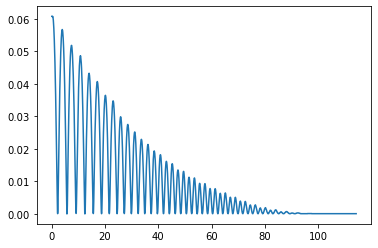

In [5]:
h = df['Position (m)'].to_numpy()
t = df['Time (s)'].to_numpy()
H = h.max()-h#cosi facendo i punti piu alti sono effetivamente le quote raggiunte dal pesetto oscillazione dopo oscillazione
plt.plot(t,H)

In [6]:
CUT=argrelmax(H)
print(CUT)


(array([  18,  534,  539,  700,  854, 1922, 2775, 3161], dtype=int64),)


# Calcolo di \Deltah/h

[-0.9392125  -0.9398294  -0.939175   -0.939175   -0.93855848 -0.9392125
 -0.9392125  -0.9392125  -0.9392125  -0.9392125  -0.9392125  -0.9392125
 -0.9385956  -0.93925    -0.93863272 -0.9392875  -0.9392875  -0.93990517
 -0.93863272 -0.93866983 -0.93808891 -0.93816238 -0.93761626 -0.9377253
 -0.93783433 25.         26.         27.         28.         29.        ]


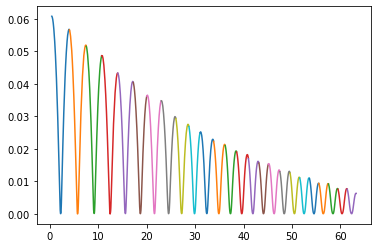

In [117]:
cut=np.array([  18,  200, 375, 534 ,  700,  860, 1000, 1150, 1300, 1435, 1550,1690, 1810, 1928, 2050 ,2158, 2255, 2375,2480, 2580 ,2680, 2777,2877,2975,3070,3164])
delta_H=np.arange(30.0)
for i in range(cut.size-1):
    
    H_=H[cut[i]:cut[i+1]]
    t_=t[cut[i]:cut[i+1]]
    delta_H[i]=(H[i]- H[i+1]/ H[i])
    (delta_H[i])
    plt.plot(t_,H_)
    
print(delta_H)

[-0.9392125  -0.939175   -0.93855848 -0.9392125  -0.9392125  -0.9392125
 -0.9385956  -0.93863272 -0.9392875  -0.93863272 -0.93808891 -0.93761626
 -0.93783433]


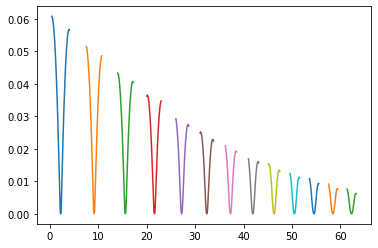

In [118]:
cut=np.array([  18,  200, 375, 534 ,  700,  860, 1000, 1150, 1300, 1435, 1550,1690, 1810, 1928, 2050 ,2158, 2255, 2375,2480, 2580 ,2680, 2777,2877,2975,3070,3164])
delta_H=np.arange(13.0)
for i in range(int(cut.size/2)):
    
    H_=H[cut[2*i]:cut[2*i+1]]
    t_=t[cut[2*i]:cut[2*i+1]]
    delta_H[i]=(H[2*i]- H[2*i+1]/ H[2*i])
    plt.plot(t_,H_)
print(delta_H)

In [119]:
delta=np.mean(delta_H)
std=np.std(delta_H)
print(delta,std)

-0.9387131926536004 0.0005516711450069313


# istogramma di deltah/h e calcolo di Ma 

(array([6., 4., 1., 2.]),
 array([-0.9392875 , -0.93886969, -0.93845188, -0.93803407, -0.93761626]),
 <BarContainer object of 4 artists>)

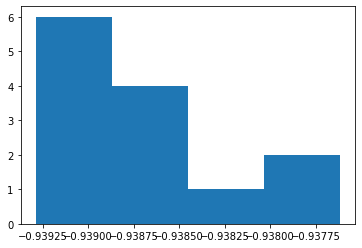

In [120]:
binsize=std
interval_bins=delta_H.max()-delta_H.min()
nbins=int(interval_bins/binsize+1)
plt.hist(delta_H,nbins)



In [126]:
r=0.01066
m=0.5593
g=9.8065
M_a1=(m*g*r*delta)/(2-delta)
M_a1


-0.018676340169021508

In [135]:
ris=0.0000005
sigma_m=0.1
sigma_r=0.000022
sigma_M=(((g*r*delta*sigma_m)/(2-delta))**2 + ((m*g*delta*sigma_r)/(2-delta))**2 + ((2*std*m*g*r*(1-delta))/(2-delta)**2)**2)**0.5
sigma_M

0.0033394886341456265

In [136]:
B = 2.9728
m_b = 0.0535167
R = 0.17666
M_a2 = m*g*r -(2*m_b*R*R)/(B*r)
M_a2

-0.04694012462951171

In [137]:
(M_a2-M_a1)/(0.0035**2 + sigma_M**2)**0.5

-5.842545652160908